Neural Network Project Outline Comparing ML Models and Neural Networks with Keras TensorFlow

UCI Adult Income dataset, to predict whether a person earns more than $50K per year.


1. Data Overview, Preprocessing, Visualization and Feature Engineering

* Libraries and Models 

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data ploting 
import matplotlib.pyplot as plt
import seaborn as sns

* Overview & Data cleaning

In [2]:
# load the date from the csv file 
df = pd.read_csv('Data/adult - adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# the size of the dataframe 
df.shape

(48842, 15)

In [4]:
# columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# checking for missing values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# saperate the columns in the df to numerical and categorical 

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'string']).columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [8]:
# A look at every categorical column to know which method fits with that column (LE, OHE) 

dct_of_uniqes = dict()

for coln in categorical_cols:
    dct_of_uniqes[coln] = df[coln].unique()

dct_of_uniqes

{'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
        'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
        'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
        '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
       dtype=object),
 'marital-status': array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
        'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
       dtype=object),
 'occupation': array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
        'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
        'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
        'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
       dtype=object),
 'relationship': array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife

In [9]:
# I noticed that there is '?' in the data, so I treat it like missing value.

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
# Drop rows with NaN
df.dropna(inplace=True)
df.shape

(45222, 15)

In [11]:
# double check 
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

* Note: After dealing with missing data, I noticed that there are a lot of object-type columns, so I decided to drop the unnecessary columns before applying methods like one-hot encoding and label encoding.

In [12]:
# column like native-country is hard to encode, and it's not supposed to have a relationship with the taget, and so for
# race, relationship

df.drop(columns= ['native-country','race','relationship', 'educational-num', 'marital-status'], inplace = True)
df.head()

,age,workclass,fnlwgt,education,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,11th,Machine-op-inspct,Male,0,0,40,<=50K
1,38,Private,89814,HS-grad,Farming-fishing,Male,0,0,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,Protective-serv,Male,0,0,40,>50K
3,44,Private,160323,Some-college,Machine-op-inspct,Male,7688,0,40,>50K
5,34,Private,198693,10th,Other-service,Male,0,0,30,<=50K


* Visualization, Some plots to see the relation between important features and target

* A look at the target 

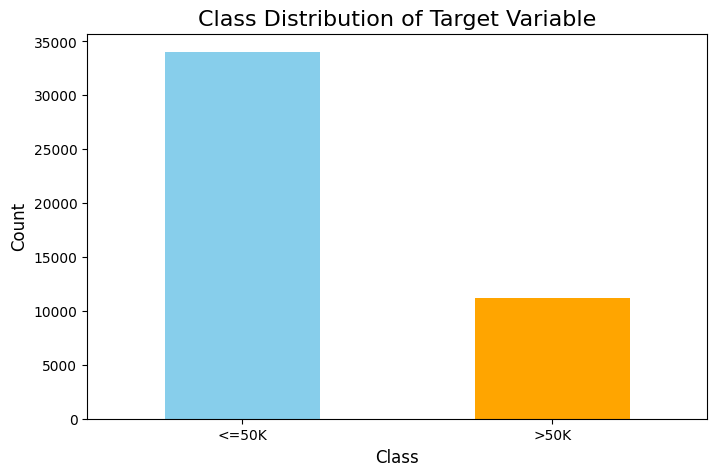

In [13]:
target_counts = df['income'].value_counts()

# bar chart for income distribution 
plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution of Target Variable', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  
plt.show()

* Age and Income

C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\3832729232.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=df, palette="Set3")


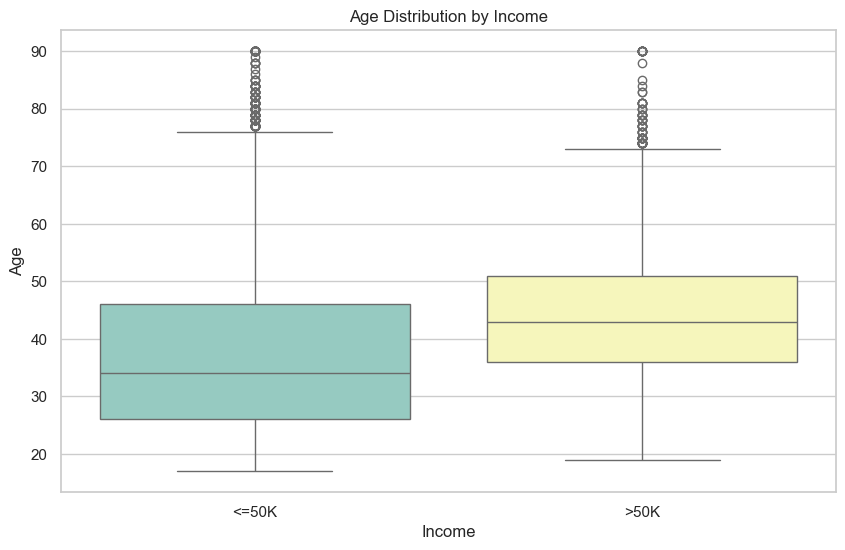

In [14]:
sns.set(style="whitegrid")

# Boxplot to show the distribution of age for each target class
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df, palette="Set3")
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

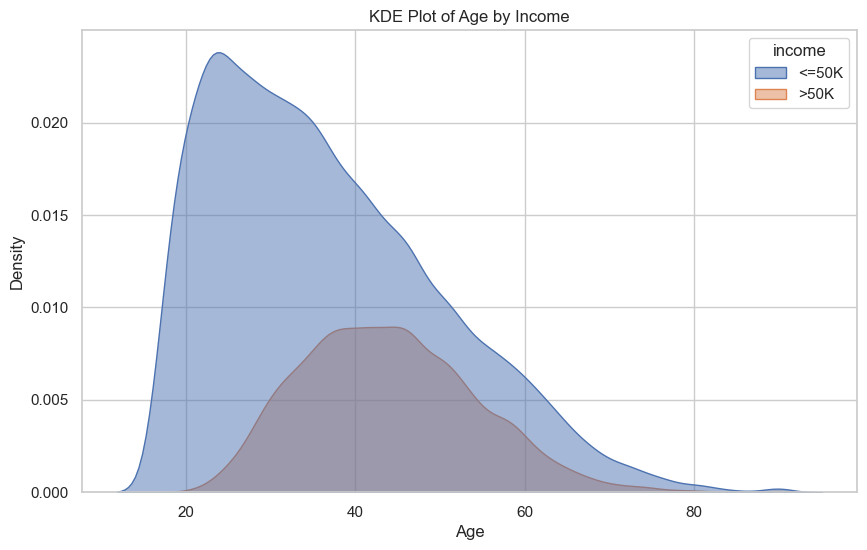

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='income', fill=True, alpha=0.5)
plt.title('KDE Plot of Age by Income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [16]:
# I choose to remove outliers because I imagine a case of stadying a typical person's income.

# Calculate Q1 and Q3 for the 'age' column

Q1 = df['age'].quantile(0.25)  # 25th percentile
Q3 = df['age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1 # 

# Define lower and upper bounds for age
lower_bound = Q1 - 1.5 * IQR # less than that gonna be an outlier
upper_bound = Q3 + 1.5 * IQR # more that that gonna be an outlier

# Filter the DataFrame to remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

print(f"Data shape: {df.shape}")


Data shape: (44953, 10)


C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\4156123102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=df, palette="Set3")


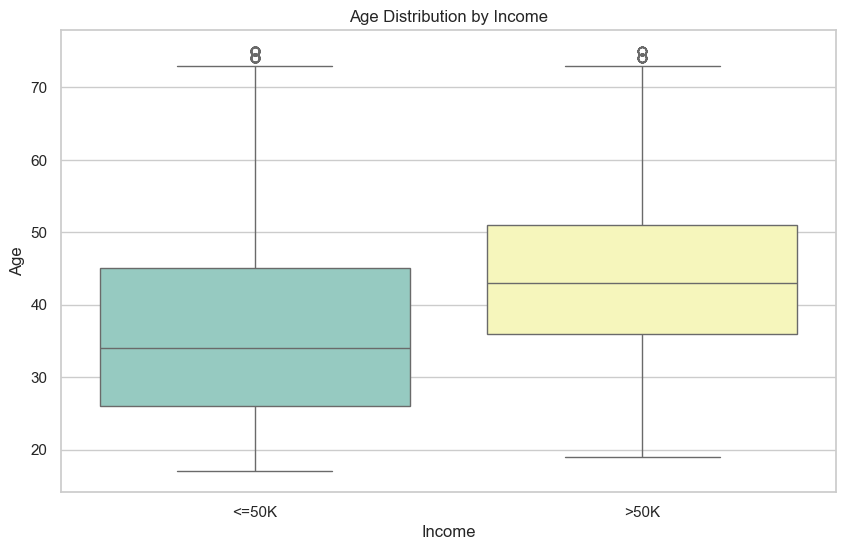

In [17]:
# after removing outliers 

plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df, palette="Set3")
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

* Education and Target

C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\1975276068.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='education', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")
C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\1975276068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")


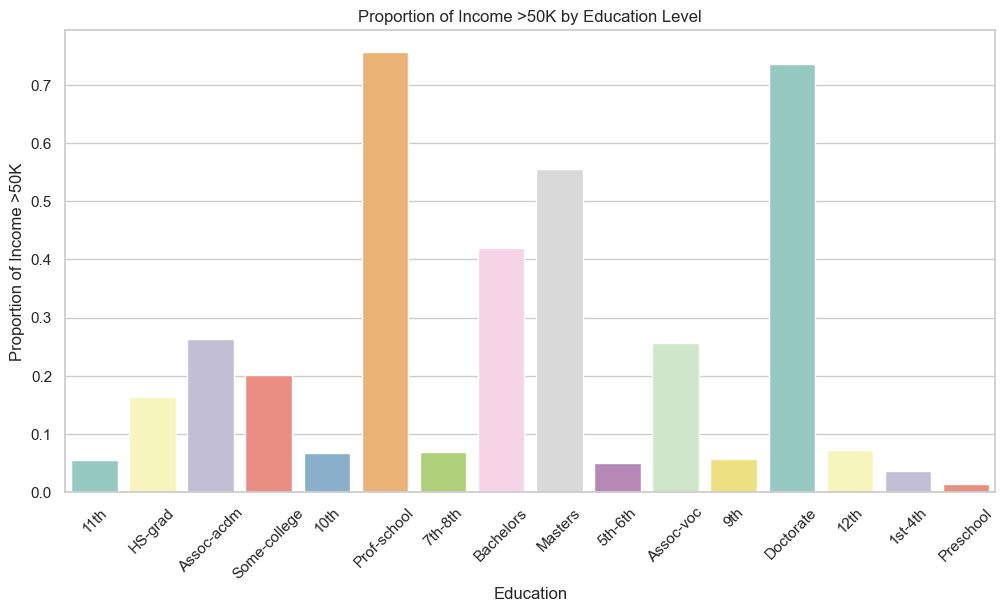

In [18]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")
plt.title('Proportion of Income >50K by Education Level')
plt.xlabel('Education')
plt.ylabel('Proportion of Income >50K')
plt.xticks(rotation=45)
plt.show()

In [19]:
# let's say it's custome label encoding to have more control

education_order = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-voc': 10,
    'Assoc-acdm': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15
}

# Apply the custom mapping to the 'education' column
df['education_encoded'] = df['education'].map(education_order)

# Display the result
df[['education', 'education_encoded']].head()



,education,education_encoded
0,11th,6
1,HS-grad,8
2,Assoc-acdm,11
3,Some-college,9
5,10th,5


In [20]:
df.drop(columns= 'education', inplace = True)

* Hours-per-week and target

C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\2674143087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette="Set3")


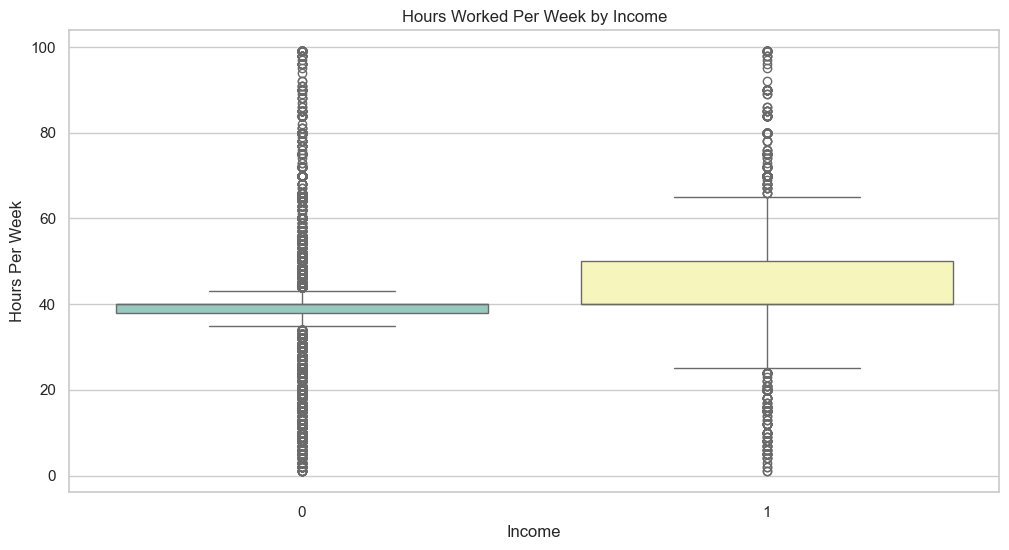

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours-per-week', data=df, palette="Set3")
plt.title('Hours Worked Per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\1867580438.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='hours-per-week', data=df, ci=None, palette="Set2")
C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\1867580438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='hours-per-week', data=df, ci=None, palette="Set2")


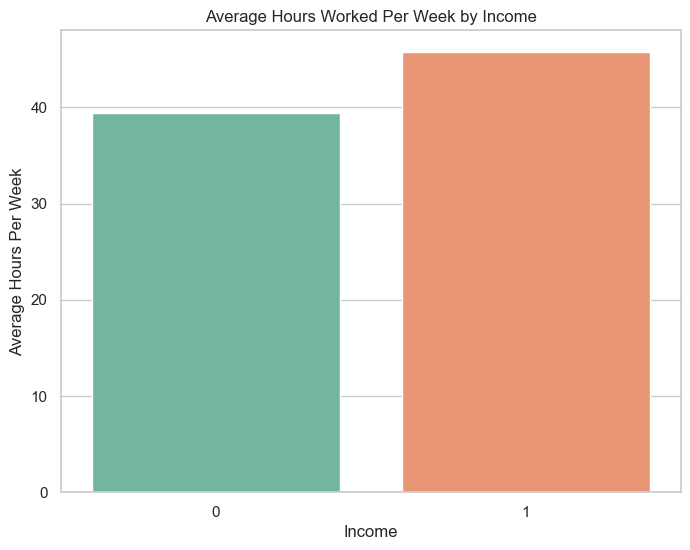

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='income', y='hours-per-week', data=df, ci=None, palette="Set2")
plt.title('Average Hours Worked Per Week by Income')
plt.xlabel('Income')
plt.ylabel('Average Hours Per Week')
plt.show()

* Note:  hours per week is a really impotant feature, it has some kind of relation with the target so I did not remove the outliers

* Occupation and target 

C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\3406874571.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='occupation', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")
C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\3406874571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='occupation', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")


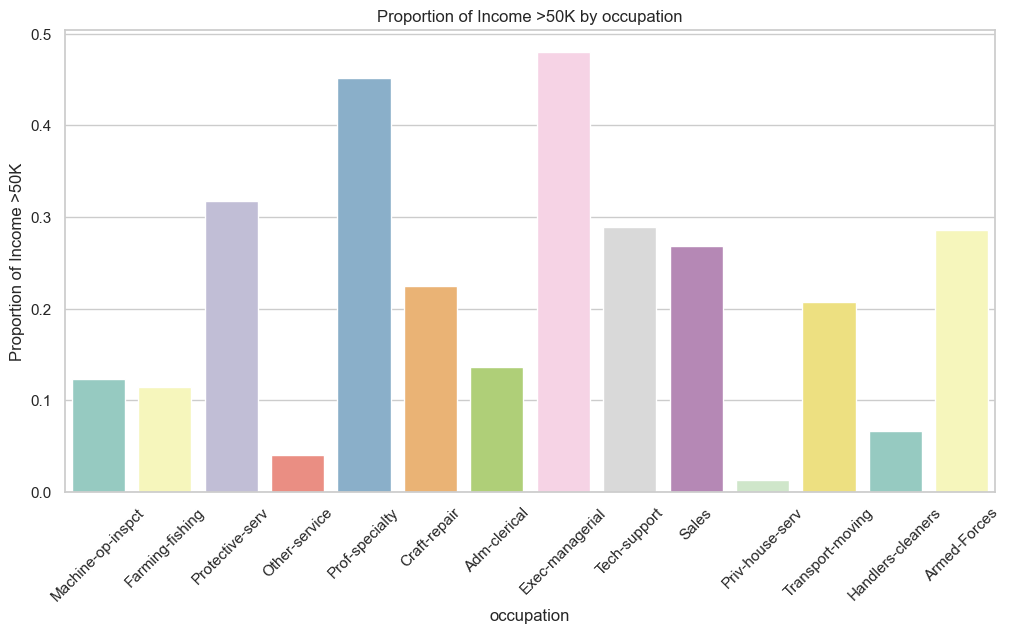

In [23]:

plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")
plt.title('Proportion of Income >50K by occupation')
plt.xlabel('occupation')
plt.ylabel('Proportion of Income >50K')
plt.xticks(rotation=45)
plt.show()

* Note: occupation is an important feature but it does not have a sepcific order so I use One-Hot-Encoding method for it

* Gender column

In [24]:
df['gender_encoded'] = df['gender'].map({'Male': 1, 'Female': 0})
df.drop(columns= 'gender', inplace = True)

* Workclass and Income 

C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\2902216235.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workclass', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")
C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\2902216235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workclass', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")


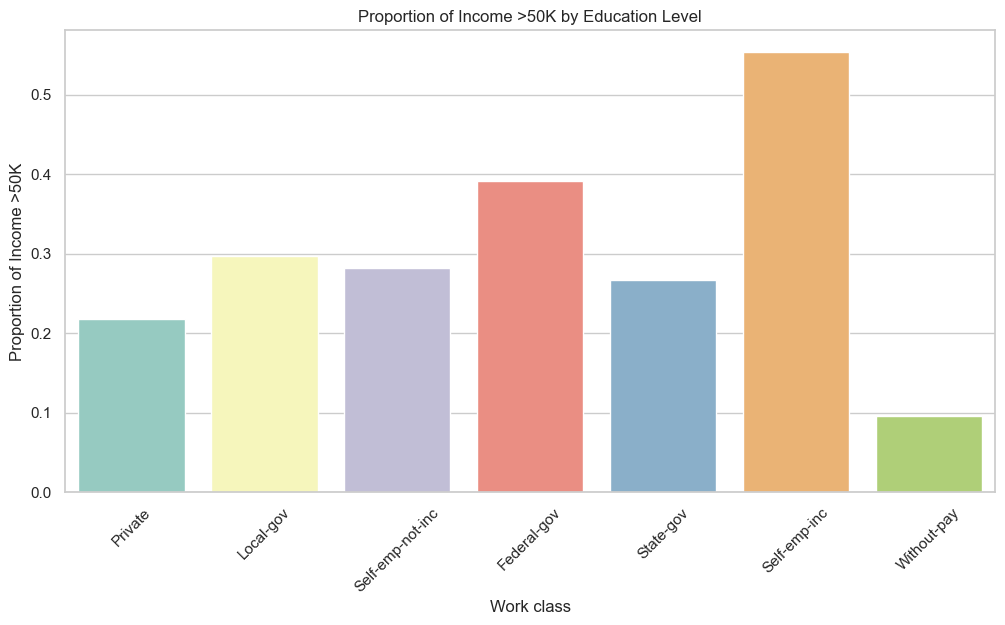

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='workclass', y='income', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette="Set3")
plt.title('Proportion of Income >50K by Education Level')
plt.xlabel('Work class')
plt.ylabel('Proportion of Income >50K')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Apply One Hot Encoding on both 'workclass' and 'occupation' columns

df_encoded = pd.get_dummies(df, columns=['workclass', 'occupation'], prefix=['Work-class', 'Occupation'])

df_encoded.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,education_encoded,gender_encoded,Work-class_Federal-gov,Work-class_Local-gov,...,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving
0,25,226802,0,0,40,0,6,1,False,False,...,False,False,True,False,False,False,False,False,False,False
1,38,89814,0,0,50,0,8,1,False,False,...,True,False,False,False,False,False,False,False,False,False
2,28,336951,0,0,40,1,11,1,False,True,...,False,False,False,False,False,False,True,False,False,False
3,44,160323,7688,0,40,1,9,1,False,False,...,False,False,True,False,False,False,False,False,False,False
5,34,198693,0,0,30,0,5,1,False,False,...,False,False,False,True,False,False,False,False,False,False


* Set all the data to be numerical data

In [27]:
# will replace the boolen values with 0 & 1
df_encoded = df_encoded.replace({False: 0, True: 1})

C:\Users\Dell\AppData\Local\Temp\ipykernel_6704\2639114166.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({False: 0, True: 1})


In [28]:
# to see columns types before we enter the data to ML models 
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44953 entries, 0 to 48841
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           44953 non-null  int64
 1   fnlwgt                        44953 non-null  int64
 2   capital-gain                  44953 non-null  int64
 3   capital-loss                  44953 non-null  int64
 4   hours-per-week                44953 non-null  int64
 5   income                        44953 non-null  int64
 6   education_encoded             44953 non-null  int64
 7   gender_encoded                44953 non-null  int64
 8   Work-class_Federal-gov        44953 non-null  int64
 9   Work-class_Local-gov          44953 non-null  int64
 10  Work-class_Private            44953 non-null  int64
 11  Work-class_Self-emp-inc       44953 non-null  int64
 12  Work-class_Self-emp-not-inc   44953 non-null  int64
 13  Work-class_State-gov          44953 

*

2.  Machine Learning Models

* Libraries and Models 

In [29]:
# data split 
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

* Train test split

In [30]:
X = df_encoded.drop(columns= 'income')
y = df_encoded['income']

# First, split into training (70%) and temp (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# stratify --> Stratification ensures that all splits have approximately the same class distribution as the original dataset.

# Then split the temp set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


* Rnadom Forest Model

In [31]:
# object from the model
rf_model = RandomForestClassifier(random_state=42)

# Train Random Forest
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Predicted probabilities for the positive class
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_roc_auc = roc_auc_score(y_test, rf_probs)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC-AUC Score: {rf_roc_auc:.4f}")

Accuracy: 0.8292
Precision: 0.8200
Recall: 0.8292
F1 Score: 0.8205
ROC-AUC Score: 0.8542


* Hyperparameter tuning for Random Froest model 

In [32]:
# hyperparameter grid
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=params_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict using the best model
rf_pred_best = best_rf_model.predict(X_test)

# Predicted probabilities for AUC-ROC
rf_probs_best = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
hp_rf_accuracy = accuracy_score(y_test, rf_pred_best)
hp_rf_precision = precision_score(y_test, rf_pred_best, average='weighted')
hp_rf_recall = recall_score(y_test, rf_pred_best, average='weighted')
hp_rf_f1 = f1_score(y_test, rf_pred_best, average='weighted')
hp_rf_roc_auc = roc_auc_score(y_test,rf_probs_best)

print(f"Accuracy: {hp_rf_accuracy}")
print(f"Precision: {hp_rf_precision}")
print(f"Recall: {hp_rf_recall}")
print(f"F1 Score: {hp_rf_f1}")
print(f"AUC-ROC: {hp_rf_roc_auc}")

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.8429482426219783
Precision: 0.8373460044181485
Recall: 0.8429482426219783
F1 Score: 0.8296554535554361
AUC-ROC: 0.8768849494655947


* Logistic Regression Model

In [33]:
# object from the model
lr_model = LogisticRegression(max_iter=1000)

# Train Logistic Regrassion
lr_model.fit(X_train, y_train)

# Predicts
lr_pred = lr_model.predict(X_test)


# Predicted probabilities for the positive class
lr_probs = lr_model.predict_proba(X_test)[:, 1]


# Evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
lr_roc_auc = roc_auc_score(y_test, lr_probs)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"ROC-AUC Score: {lr_roc_auc:.4f}")

Accuracy: 0.8170
Precision: 0.8051
Recall: 0.8170
F1 Score: 0.8023
ROC-AUC Score: 0.8229


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Hyperparameter tuning for Logistic Regression Model

In [34]:
# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers for optimization
    'max_iter' : [1000, 2500, 5000] # Maximum number of iterations
}

# Initialize Logistic Regression model
lr_model = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_lr_model = grid_search.best_estimator_

# Predict using the best model
lr_pred_best = best_lr_model.predict(X_test)

# Predicted probabilities for the positive class
lr_probs_best = best_lr_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
hp_lr_accuracy = accuracy_score(y_test, lr_pred_best)
hp_lr_precision = precision_score(y_test, lr_pred_best, average='weighted')
hp_lr_recall = recall_score(y_test, lr_pred_best, average='weighted')
hp_lr_f1 = f1_score(y_test, lr_pred_best, average='weighted')
hp_lr_roc_auc = roc_auc_score(y_test,lr_probs_best)


print(f"Accuracy: {hp_lr_accuracy}")
print(f"Precision: {hp_lr_precision}")
print(f"Recall: {hp_lr_recall}")
print(f"F1 Score: {hp_lr_f1}")
print(f"ROC-AUC Score: {hp_lr_roc_auc}")

Best hyperparameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8242621978347916
Precision: 0.8141233853358993
Recall: 0.8242621978347916
F1 Score: 0.8096412850814727
ROC-AUC Score: 0.8541127659328742


3.  Neural Network in Keras

* Libraries and Models

In [35]:
# main libraries 
import tensorflow as tf
import keras_tuner as kt

# model and neural 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras_tuner import HyperParameters  

# preprocessing
from sklearn.preprocessing import StandardScaler


In [36]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


* First Model 

In [37]:
# Define the model
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1])) 
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))  # Single neuron for binary classification

# Compile the model
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Train the model
history1 = model1.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32, # A subset of the training samples
    verbose=1 # Detailed progress bar for each epoch.
)

Epoch 1/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7801 - loss: 0.4640 - val_accuracy: 0.8256 - val_loss: 0.3852
Epoch 2/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.8257 - loss: 0.3874 - val_accuracy: 0.8278 - val_loss: 0.3760
Epoch 3/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8230 - loss: 0.3877 - val_accuracy: 0.8263 - val_loss: 0.3740
Epoch 4/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8323 - loss: 0.3716 - val_accuracy: 0.8280 - val_loss: 0.3740
Epoch 5/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8286 - loss: 0.3762 - val_accuracy: 0.8280 - val_loss: 0.3705
Epoch 6/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8294 - loss: 0.3726 - val_accuracy: 0.8287 - val_loss: 0.3710
Epoch 7/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8309 - loss: 0.3731 - val_accuracy: 0.8314 - val_loss: 0.3713
Epoch 8/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8326 - loss: 0.3698 - val_accuracy: 

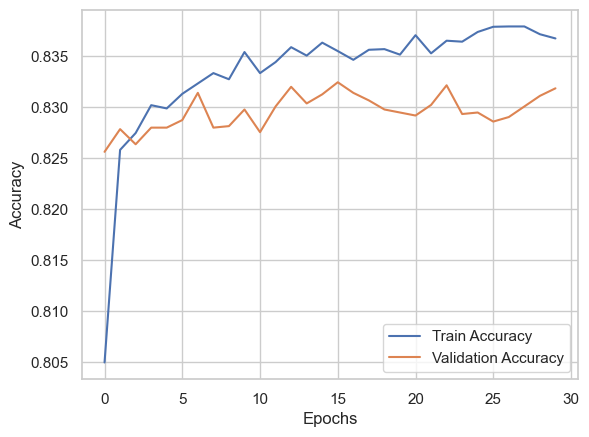

In [39]:
# plot for Model1 performance 

plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [40]:
# Evaluate on test data
y_test_pred = (model1.predict(X_test_scaled) > 0.5).astype("int32") # predicts probabilities in the range [0, 1] 
y_test_probs = model1.predict(X_test_scaled)

# Evaluation metrics
accuracy_n1 = accuracy_score(y_test, y_test_pred)
precision_n1 = precision_score(y_test, y_test_pred)
recall_n1 = recall_score(y_test, y_test_pred)
f1_n1 = f1_score(y_test, y_test_pred)
roc_auc_n1 = roc_auc_score(y_test, y_test_probs)

print(f"Accuracy for model 1: {accuracy_n1:.4f}")
print(f"Precision for model 1: {precision_n1:.4f}")
print(f"Recall for model 1: {recall_n1:.4f}")
print(f"F1 Score for model 1: {f1_n1:.4f}")
print(f"ROC-AUC Score for model 1: {roc_auc_n1:.4f}")

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
Accuracy for model 1: 0.8329
Precision for model 1: 0.7549
Recall for model 1: 0.4839
F1 Score for model 1: 0.5897
ROC-AUC Score for model 1: 0.8709


* Second Model

In [41]:
# Adding an additional hidden layer & increasing dropout rate & different activation function
# & Slower learning rate

model2 = Sequential()
model2.add(Dense(128, activation='tanh', input_dim=X_train_scaled.shape[1]))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='tanh'))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='tanh'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Train the model
history2 = model2.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32, # A subset of the training samples
    verbose=1 # Detailed progress bar for each epoch.
)

Epoch 1/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6731 - loss: 0.5971 - val_accuracy: 0.8145 - val_loss: 0.4013
Epoch 2/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8023 - loss: 0.4339 - val_accuracy: 0.8198 - val_loss: 0.3962
Epoch 3/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8071 - loss: 0.4243 - val_accuracy: 0.8189 - val_loss: 0.3943
Epoch 4/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8107 - loss: 0.4184 - val_accuracy: 0.8210 - val_loss: 0.3935
Epoch 5/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8111 - loss: 0.4119 - val_accuracy: 0.8213 - val_loss: 0.3940
Epoch 6/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8156 - loss: 0.4097 - val_accuracy: 0.8217 - val_loss: 0.3920
Epoch 7/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8178 - loss: 0.4044 - val_accuracy: 0.8214 - val_loss: 0.3908
Epoch 8/30
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8238 - loss: 0.3978 - val_accuracy: 0.

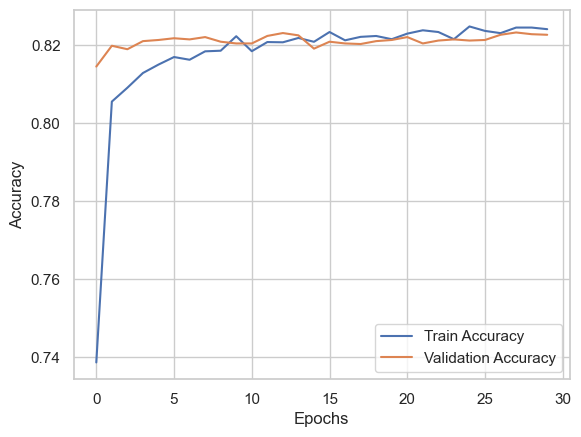

In [43]:
# plot for Model2 performance 

plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
y_test_pred = (model2.predict(X_test_scaled) > 0.5).astype("int32") # predicts probabilities in the range [0, 1] 
y_test_probs = model2.predict(X_test_scaled)
 
# Evaluation metrics
accuracy_n2 = accuracy_score(y_test, y_test_pred)
precision_n2 = precision_score(y_test, y_test_pred)
recall_n2 = recall_score(y_test, y_test_pred)
f1_n2 = f1_score(y_test, y_test_pred)
roc_auc_n2 = roc_auc_score(y_test, y_test_probs)

print(f"Accuracy for model 2: {accuracy_n2:.4f}")
print(f"Precision for model 2: {precision_n2:.4f}")
print(f"Recall for model 2: {recall_n2:.4f}")
print(f"F1 Score for model 2: {f1_n2:.4f}")
print(f"ROC-AUC Score for model 2: {roc_auc_n2:.4f}")

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
Accuracy for model 2: 0.8296
Precision for model 2: 0.7219
Recall for model 2: 0.5102
F1 Score for model 2: 0.5978
ROC-AUC Score for model 2: 0.8593


4. Neural Network Model Tuning

In [45]:
def build_model(hp):
    model = Sequential()
    
    # Input layer and first hidden layer
    model.add(Dense(
        units=hp.Int('units_layer_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1]
    ))
    
    # Additional hidden layers based on the hyperparameter
    for i in range(hp.Int('num_layers', 1, 3)):  # Tune the number of layers (1 to 3)
        model.add(Dense(
            units=hp.Int(f'units_layer_{i+2}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        # Add dropout
        model.add(Dropout(rate=hp.Float(f'dropout_{i+2}', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Summary
# Number of units in the first layer (units_layer_1): Ranges from 32 to 128.
# Number of additional layers (num_layers): Between 1 and 3 layers.
# Number of units in additional layers (units_layer_X): Ranges from 32 to 128.
# Dropout rate (dropout_X): Ranges from 0.2 to 0.5.
# Learning rate (learning_rate): Tuned between 0.001, 0.0001, and 0.00001.


In [105]:

# Set up the tuner
tuner = kt.RandomSearch(
    build_model,  # Pass the model-building function
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # Number of executions for each trial
    directory='tuning_results',  # Where to save the tuning results
    project_name='neural_network_tuning'  # Name of the tuning project
)


# Search for the best hyperparameters
tuner.search(
    X_train_scaled, y_train,
    epochs=22,
    validation_data=(X_val_scaled, y_val),  # Use validation dataset
    batch_size=32,  
    verbose=1
)


Reloading Tuner from tuning_results\neural_network_tuning\tuner0.json


In [47]:

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model on the entire training data
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=22,
    validation_data=(X_val_scaled, y_val),  # Use validation dataset
    batch_size= 32
)

Best Hyperparameters:
{'units_layer_1': 128, 'num_layers': 1, 'units_layer_2': 96, 'dropout_2': 0.2, 'learning_rate': 0.001}
Epoch 1/22


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8042 - loss: 0.4194 - val_accuracy: 0.8210 - val_loss: 0.3811
Epoch 2/22
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8306 - loss: 0.3737 - val_accuracy: 0.8219 - val_loss: 0.3753
Epoch 3/22
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8349 - loss: 0.3683 - val_accuracy: 0.8287 - val_loss: 0.3739
Epoch 4/22
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8353 - loss: 0.3637 - val_accuracy: 0.8262 - val_loss: 0.3703
Epoch 5/22
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8329 - loss: 0.3686 - val_accuracy: 0.8297 - val_loss: 0.3748
Epoch 6/22
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8291 - loss: 0.3684 - val_accuracy: 0.8302 - val_loss: 0.3735
Epoch 7/22
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8353 - loss: 0.3615 - val_accuracy: 0.8249 - val_loss: 0.3727
Epoch 8/22
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8388 - loss: 0.3596 - val_accuracy: 0.8284 - val_

In [48]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

Best Hyperparameters:
{'units_layer_1': 128, 'num_layers': 1, 'units_layer_2': 96, 'dropout_2': 0.2, 'learning_rate': 0.001}


In [49]:
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8324 - loss: 0.3769
Test Accuracy: 0.8346


In [50]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled).ravel()  # Ravel to flatten predictions
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate metrics
kt_accuracy = accuracy_score(y_test, y_test_pred_binary)
kt_precision = precision_score(y_test, y_test_pred_binary)
kt_recall = recall_score(y_test, y_test_pred_binary)
kt_f1 = f1_score(y_test, y_test_pred_binary)
kt_roc_auc = roc_auc_score(y_test, y_test_pred)  # Use probabilities for ROC-AUC

# results

print(f"Accuracy: {kt_accuracy:.4f}")
print(f"Precision: {kt_precision:.4f}")
print(f"Recall: {kt_recall:.4f}")
print(f"F1-Score: {kt_f1:.4f}")
print(f"ROC-AUC: {kt_roc_auc:.4f}")


211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
Accuracy: 0.8346
Precision: 0.7629
Recall: 0.4845
F1-Score: 0.5926
ROC-AUC: 0.8686


5. Conclusion and Comparison

In [102]:
# dict that contain every model and it's preforme
result_df = {
    'Accuracy': {
        'Random Forest': rf_accuracy,
        'hp Random Forest': hp_rf_accuracy,
        'Logistic Regression' : lr_accuracy,
        'hp logistic Regrassion': hp_lr_accuracy,
        'Model 1 NN': accuracy_n1,
        'Model 2 NN': accuracy_n2,
        'Keras-Tuner': kt_accuracy
    },
    'Precision': {
        'Random Forest': rf_precision,
        'hp Random Forest': hp_rf_precision,
        'Logistic Regression' : lr_precision,
        'hp logistic Regrassion': hp_lr_precision,
        'Model 1 NN': precision_n1,
        'Model 2 NN': precision_n2,
        'Keras-Tuner': kt_precision
    },
    'Recall': {
        'Random Forest': rf_recall,
        'hp Random Forest': hp_rf_recall,
        'Logistic Regression' : lr_recall,
        'hp logistic Regrassion': hp_lr_recall,
        'Model 1 NN': recall_n1,
        'Model 2 NN': recall_n2,
        'Keras-Tuner': kt_recall
    },
    'F1 score': {
        'Random Forest': rf_f1,
        'hp Random Forest': hp_rf_f1,
        'Logistic Regression' : lr_f1,
        'hp logistic Regrassion': hp_lr_f1,
        'Model 1 NN': f1_n1,
        'Model 2 NN': f1_n2,
        'Keras-Tuner': kt_f1
    },
    'ROC-AUC': {
        'Random Forest': rf_roc_auc,
        'hp Random Forest': hp_rf_roc_auc,
        'Logistic Regression' : lr_roc_auc,
        'hp logistic Regrassion': hp_lr_roc_auc,
        'Model 1 NN': roc_auc_n1,
        'Model 2 NN': roc_auc_n2,
        'Keras-Tuner': kt_roc_auc
    }
}

result = pd.DataFrame(result_df)

In [103]:
result

,Accuracy,Precision,Recall,F1 score,ROC-AUC
Random Forest,0.829156,0.819960,0.829156,0.820505,0.854179
hp Random Forest,0.842948,0.837346,0.842948,0.829655,0.876885
Logistic Regression,0.816995,0.805112,0.816995,0.802324,0.822916
hp logistic Regrassion,0.824262,0.814123,0.824262,0.809641,0.854113
Model 1 NN,0.832864,0.754893,0.483871,0.589734,0.870941
Model 2 NN,0.829601,0.721893,0.510155,0.597830,0.859261
Keras-Tuner,0.834643,0.762935,0.484468,0.592620,0.868606


* Some plots to show how well the model is based on the mitrics

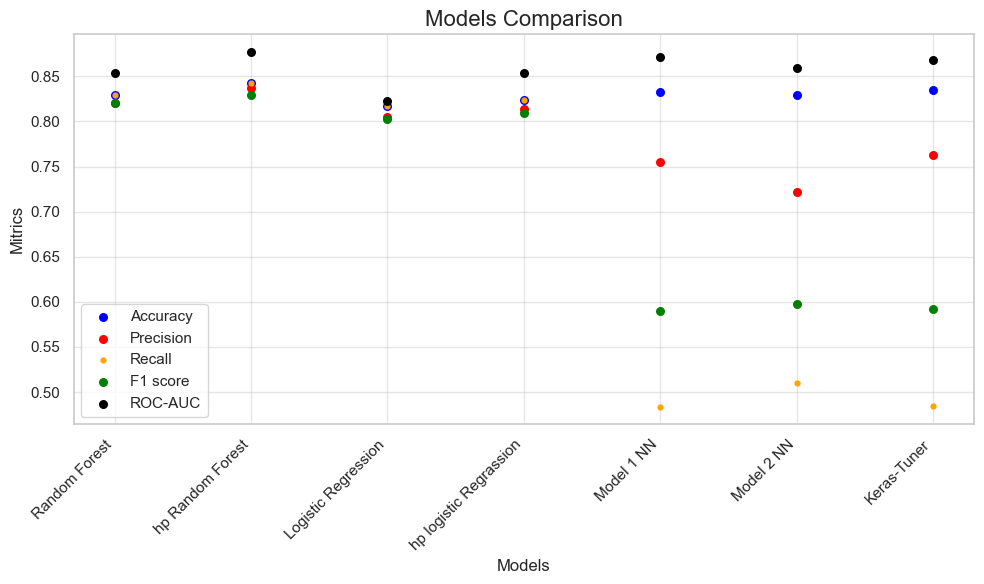

In [104]:
plt.figure(figsize=(10, 6))

# Scatter plot 
plt.scatter(result.index, result['Accuracy'], color='blue', s=30, label='Accuracy')
plt.scatter(result.index, result['Precision'], color='red', s=30, label='Precision')
plt.scatter(result.index, result['Recall'], color='orange', s=12, label='Recall')
plt.scatter(result.index, result['F1 score'], color='green', s=30, label='F1 score')
plt.scatter(result.index, result['ROC-AUC'], color='black', s=30, label='ROC-AUC')


# Add labels and title
plt.title('Models Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Mitrics', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

* The plot and result data show that hyperparameter tuning for the random forest model yields the best performance for this case. However, why didn’t the neural network perform as well?
* It could be because the dataset wasn’t large enough. We know that neural networks tend to perform better with larger datasets.
* Alternatively, it’s possible that the neural network wasn’t built or configured optimally.
* Either way, this marks the conclusion of this project.



In [106]:
# Mohammad Al-Hriry, Nov 27, 2024